In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Data importing, understanding and cleaning

In [2]:
#Importing CarPrice_Assignment Dataset
Car_Price = pd.read_csv("CarPrice_Assignment.csv", sep=",", encoding = "ISO-8859-1")
Car_Price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Checking dimension of the data
Car_Price.shape

(205, 26)

In [4]:
#Checking which columns consists of null values
Car_Price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#Checking unique data
Car_Price.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
#Checking data type across variables
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#Changing Symboling from int/numeric to object/categorical
Car_Price['symboling'] = Car_Price['symboling'].astype(str)
Car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

In [8]:
#Description
Car_Price.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#Extracting car company and car model from CarName
Car_Price[['car_company', 'car_model']] = Car_Price['CarName'].str.split(n=1, expand=True)
Car_Price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [10]:
Car_Price.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### We observe that there are duplicate company names with incorrect spelling. We will need to rectify it

In [11]:
#Rectification of car company names
Car_Price.car_company = Car_Price.car_company.str.lower()

def replace_name(a,b):
    Car_Price.car_company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

Car_Price.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#Number of car companies in the data
car_number = Car_Price.groupby(['car_company'])['car_company'].count().sort_values(ascending=False)
car_number

car_company
toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

#### The top 6 company originate from Japan, i.e the biggest automobile players in the US market is Japan

In [13]:
#Checking for duplicate values

Car_Price.loc[Car_Price.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model


### EDA and Data Vizualization

###### Approach - 1. Using Visualization and EDA techniques, to identify the variables which can be considered as significant variables for further analysis; 2. Using mixed technique for Linear Regression (RFE and Manual) to determine the best model for the analysis

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


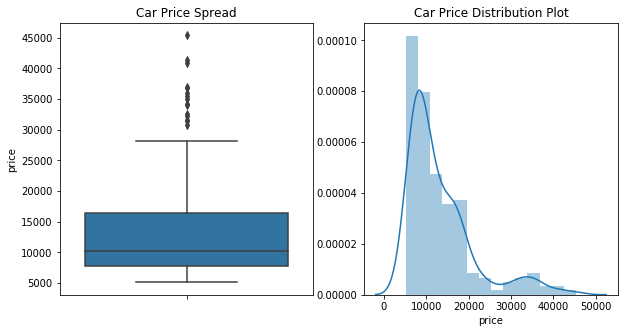

In [14]:
#Exploring the dependent variable "price" and finding the benchmark

print(Car_Price.price.describe(percentiles = [0.25,0.50,0.75]))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Car Price Spread')
sns.boxplot(y=Car_Price.price)
plt.subplot(1,2,2)
plt.title('Car Price Distribution Plot')
sns.distplot(Car_Price.price)
plt.show()

# The mean and median of the price dataset it significantly different, which shows presence of outliers, 
# and high variance of car prices. The majority of the data spread is lies below 15000. Hence, we see
# that there is a skewness towards the right of the distribution chart.

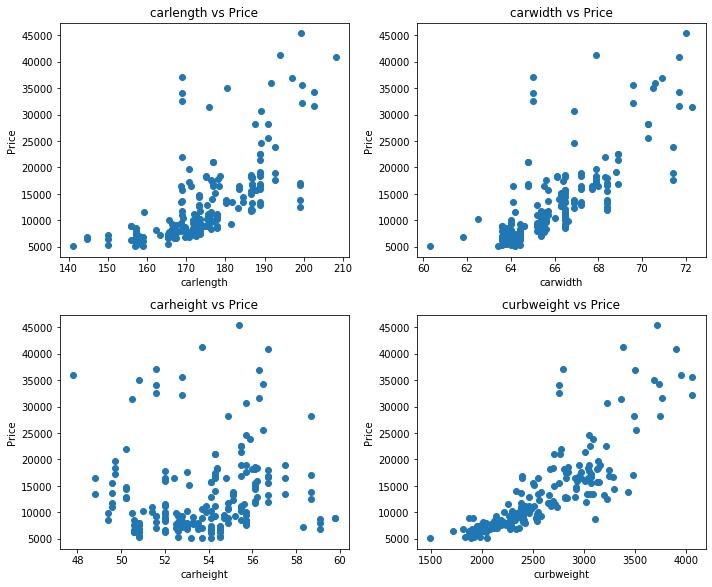

In [15]:
# Analysing data using car dimensions (length,width,height and weight )

def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(Car_Price[x],Car_Price['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#Car length, width and weight has a positive correlation with car price, so as they increase, so does price.
#Car height does not indicate having any correlation with car price.

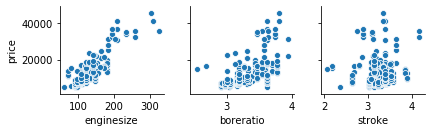

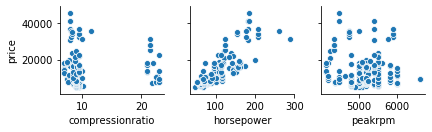

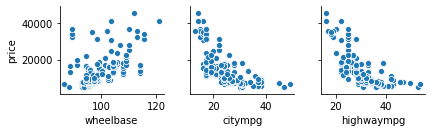

In [16]:
# Analysing the data across other features of car

def pl(x,y,z):
    sns.pairplot(Car_Price, x_vars=[x,y,z], y_vars='price',size=2, aspect=1, kind='scatter')
    plt.show()

pl('enginesize', 'boreratio', 'stroke')
pl('compressionratio', 'horsepower', 'peakrpm')
pl('wheelbase', 'citympg', 'highwaympg')

# Enginesize, boreratio, horsepower and wheelbase has a positive correlation with car price
# citympg and highwaympg has a negative correlation with car price
# We cannot find any significant relationship between stroke, compression ratio, peakrpm and car price respectively.

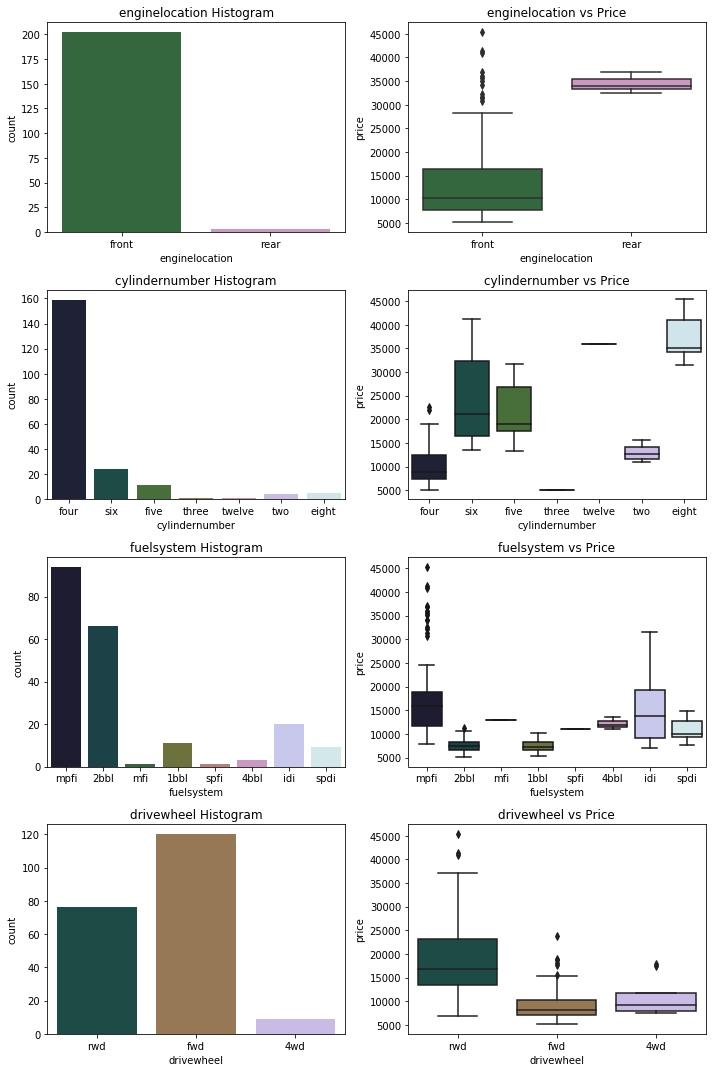

In [17]:
# Other car charactericstics analysis

def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(Car_Price[x],palette=("cubehelix"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=Car_Price[x], y=Car_Price.price, palette=("cubehelix"))
    
plt.figure(figsize=(10,15))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

# Enginelocation type "front" is on the higher side in the data based on count and also, based on the car price front 
# enginelocation is on the lower side (~5500 to 15500). four cylinder number is the most common among cars, while
# mpfi and 2bbl are more common fuelsystem. rwd drivewheel is among the expensive side of car price.

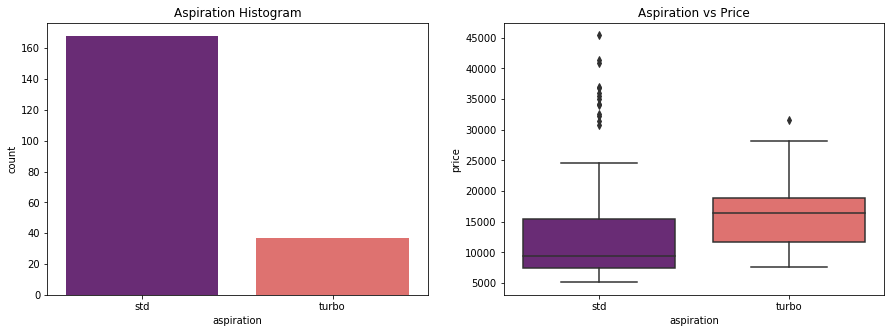

In [18]:
#Aspiration

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(Car_Price.aspiration, palette=("magma"))
plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=Car_Price.aspiration, y=Car_Price.price, palette=("magma"))
plt.show()

#turbo aspiration is among the costlier cars

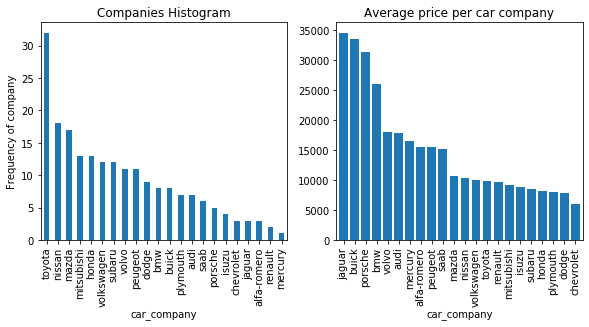

In [19]:
# Exploring Car Company

plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
plt1 = Car_Price.car_company.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'car_company', ylabel='Frequency of company')
plt.subplot(1,3,2)
df=Car_Price.groupby(['car_company'])['price'].mean().sort_values(ascending=False)
plt.title('Average price per car company')
ax = df.plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.show()

#Based on popularity toyota is highest, on the other hand jaguar has the highest average price

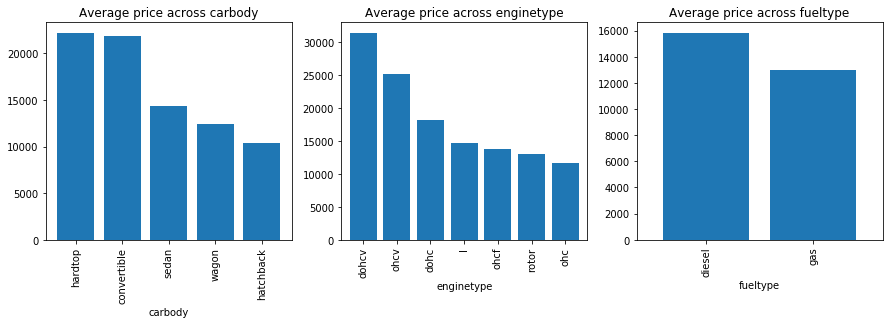

In [20]:
#Average Price analysis across other car factors

plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
df=Car_Price.groupby(['carbody'])['price'].mean().sort_values(ascending=False)
plt.title('Average price across carbody')
ax = df.plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)

plt.subplot(1,3,2)
df=Car_Price.groupby(['enginetype'])['price'].mean().sort_values(ascending=False)
plt.title('Average price across enginetype')
ax = df.plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)

plt.subplot(1,3,3)
df=Car_Price.groupby(['fueltype'])['price'].mean().sort_values(ascending=False)
plt.title('Average price across fueltype')
ax = df.plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.show()

# Hardtop, convertible are the most costly among carbody, dohcv is the most costly among enginetype and diesel fueltype
# cars are typically expensive in the US market

In [21]:
# Creating a derived column bin as car_price_range based on mean price of each company

Car_Price['price'] = Car_Price['price'].astype('int')
t1 = Car_Price.copy()
table = t1.groupby(['car_company'])['price'].mean()
t1 = t1.merge(table.reset_index(), how='left',on='car_company')
bins = [0,10000,20000,40000]
Car_Price_bin=['Budget','Medium','Highend']
Car_Price['car_price_range'] = pd.cut(t1['price_y'],bins,right=False,labels=Car_Price_bin)
Car_Price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model,car_price_range
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,giulia,Medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,stelvio,Medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,Quadrifoglio,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,audi,100 ls,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,audi,100ls,Medium


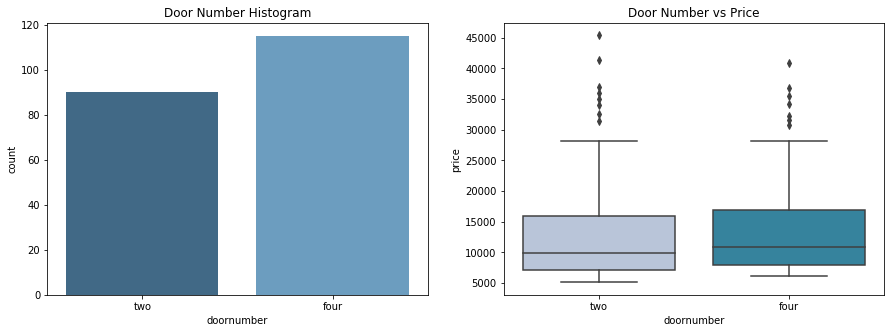

In [22]:
#Door number
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(Car_Price.doornumber, palette=("Blues_d"))
plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=Car_Price.doornumber, y=Car_Price.price, palette=("PuBuGn"))
plt.show()

# Car with 4 doors are more common, however there is no significant difference in between the prices of 2 door and 4 door cars

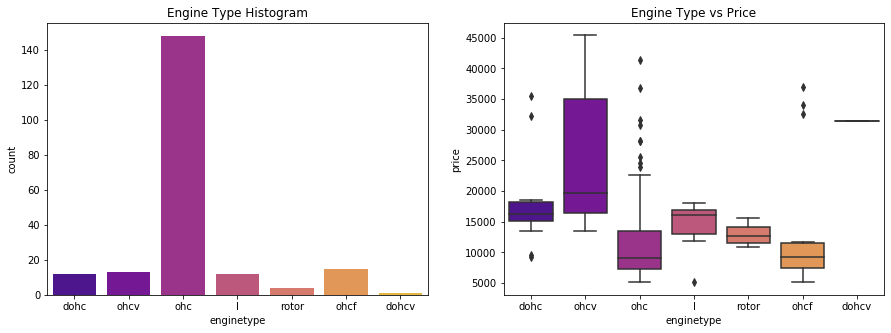

In [23]:
#Engine Type

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(Car_Price.enginetype, palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=Car_Price.enginetype, y=Car_Price.price, palette=("plasma"))

plt.show()

# ohc engine type is the most common type among others, while ohcv engine type cars are expensive side in comparison to others

### We have identified few variables from the data using EDA techniques, analysing the data overall and also taking help of data visualization. We shall proceed with the modeling

 - Finalysing the dataset with the identified variables
 - Creating dummy variables
 - Linear Regression Modeling

In [24]:
#Creating the new data set using identified variables

carprice_lr = Car_Price[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 
                         'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength',
                         'carwidth','car_price_range']]
carprice_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,car_price_range
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


In [25]:
#Info on the new dataset
carprice_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
price              205 non-null int32
fueltype           205 non-null object
aspiration         205 non-null object
carbody            205 non-null object
drivewheel         205 non-null object
wheelbase          205 non-null float64
curbweight         205 non-null int64
enginetype         205 non-null object
cylindernumber     205 non-null object
enginesize         205 non-null int64
boreratio          205 non-null float64
horsepower         205 non-null int64
carlength          205 non-null float64
carwidth           205 non-null float64
car_price_range    205 non-null category
dtypes: category(1), float64(4), int32(1), int64(3), object(6)
memory usage: 22.0+ KB


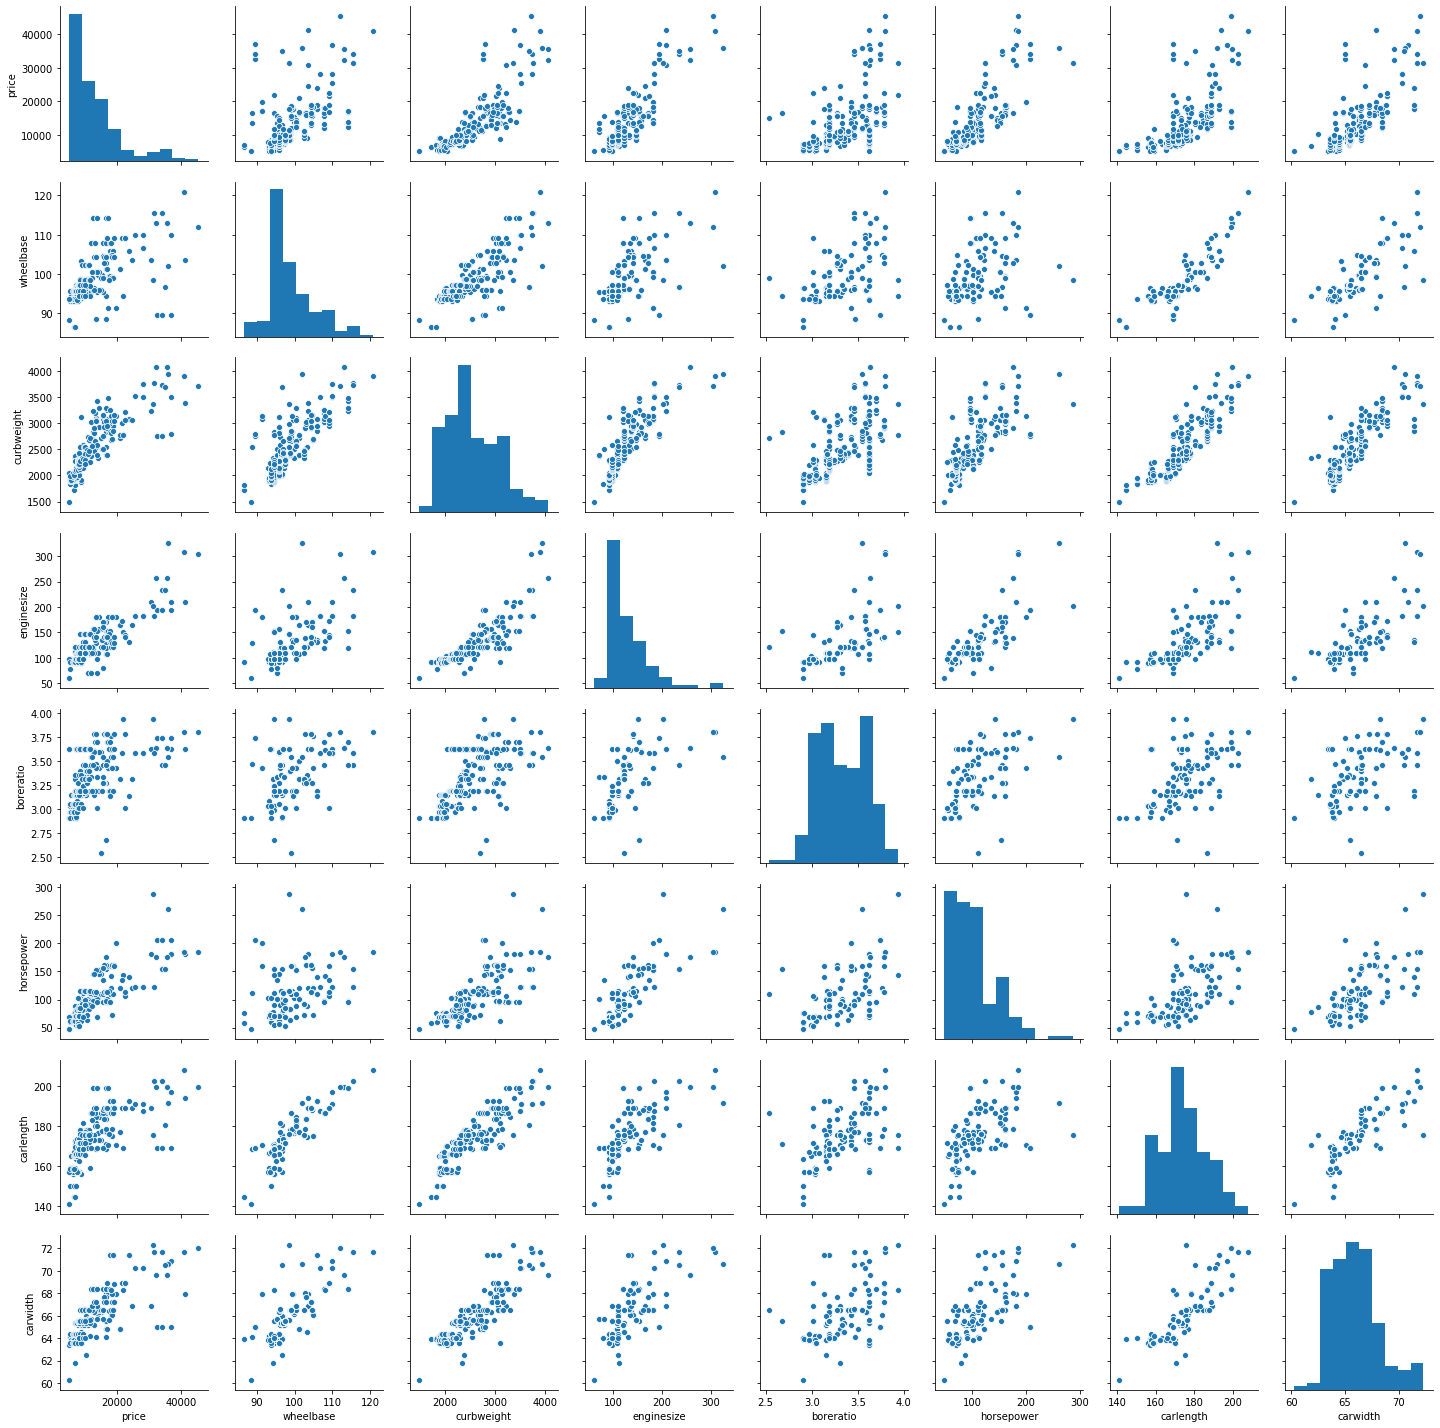

In [26]:
#Plotting to check correlation among the variables
sns.pairplot(carprice_lr)
plt.show()

In [27]:
#Creating dummy variables for categorical / object type variables

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

carprice_lr = dummies('fueltype',carprice_lr)
carprice_lr = dummies('aspiration',carprice_lr)
carprice_lr = dummies('carbody',carprice_lr)
carprice_lr = dummies('drivewheel',carprice_lr)
carprice_lr = dummies('enginetype',carprice_lr)
carprice_lr = dummies('cylindernumber',carprice_lr)
carprice_lr = dummies('car_price_range',carprice_lr)

In [28]:
print(carprice_lr.shape)
carprice_lr.head()

(205, 30)


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [29]:
# Importing libraries for linear regression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Dividing data into train and test set

np.random.seed(0)
df_train, df_test = train_test_split(carprice_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
#Check after modification
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [33]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


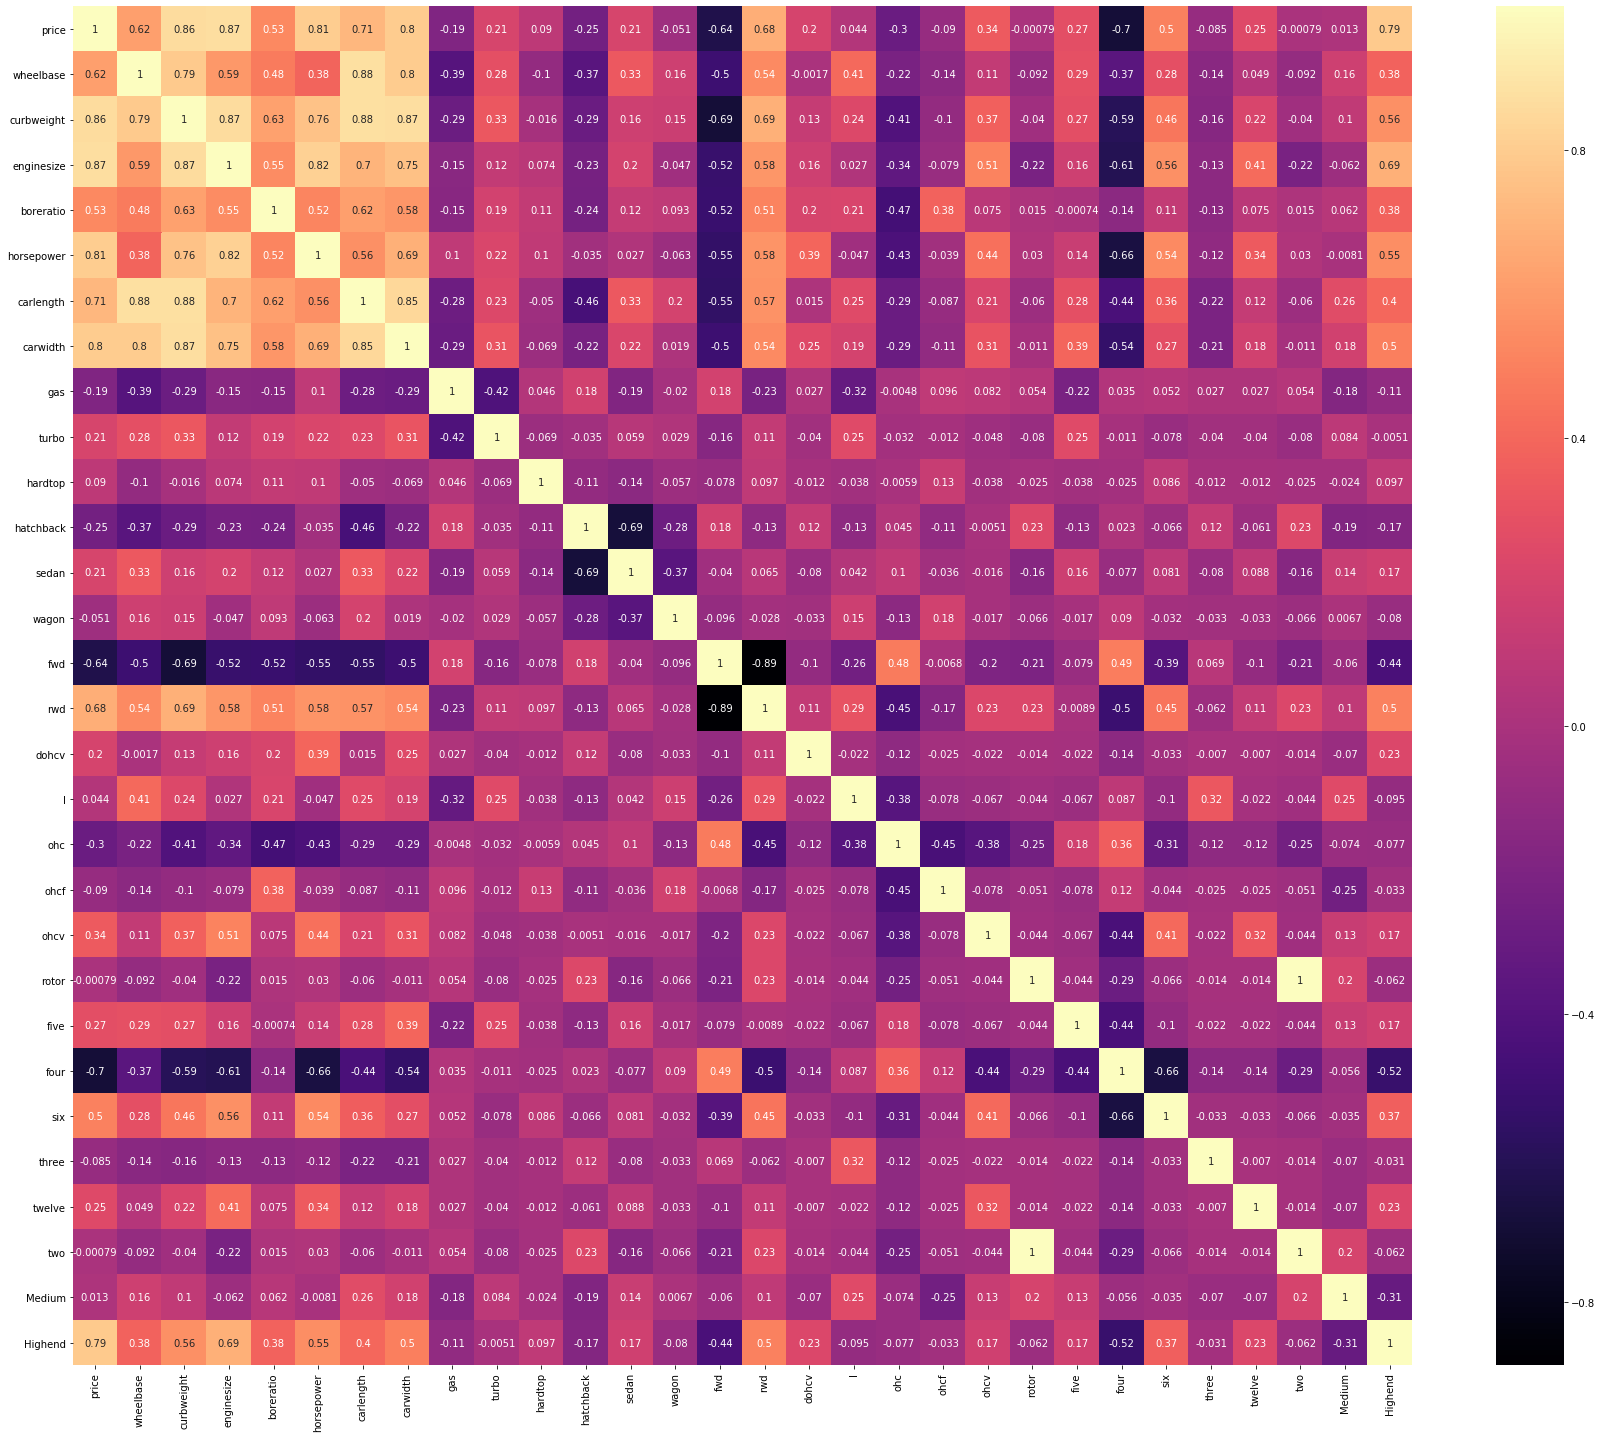

In [34]:
# Check correlation using heatmap

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="magma")
plt.show()

# Car Price is highly correlated to enginesize (0.87), curbweight (0.86), horsepower (0.81), carwidth (0.8), carlength (0.71)

### Linear Regression Modeling

In [35]:
#Dividing the data into X and y variable

X_train = df_train
y_train = df_train.pop('price')

In [36]:
#Using RFE technique to find the most significant variables (Top 10)

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('gas', False, 4),
 ('turbo', False, 17),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 20),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 12),
 ('rotor', False, 19),
 ('five', False, 6),
 ('four', False, 5),
 ('six', False, 10),
 ('three', True, 1),
 ('twelve', False, 9),
 ('two', False, 16),
 ('Medium', False, 14),
 ('Highend', True, 1)]

In [38]:
# List of top 10 variables using RFE techniques
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'hatchback', 'sedan', 'wagon', 'dohcv', 'three', 'Highend'], dtype='object')

In [39]:
# Data extract using RFE technique for modeling
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth,hatchback,sedan,wagon,dohcv,three,Highend
122,0.272692,0.139623,0.083333,0.291667,0,1,0,0,0,0
125,0.500388,0.339623,0.395833,0.666667,1,0,0,0,0,1
166,0.314973,0.139623,0.266667,0.308333,1,0,0,0,0,0
1,0.411171,0.260377,0.262500,0.316667,0,0,0,0,0,0
199,0.647401,0.260377,0.475000,0.575000,0,0,1,0,0,0


In [40]:
#Now using the manual technique and detailed statistics to perform linear modeling

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # Fitting the model
    print(lm.summary()) # Model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [41]:
#Running Model 1

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           7.63e-71
Time:                        13:26:10   Log-Likelihood:                 206.41
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     132   BIC:                            -358.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0312      0.026     -1.192      0.2

In [42]:
# p value of enginesize is higher than significance value of 0.05, hence we will go ahead and drop it since it is insignificant
# in presense of other independent variables
X_train_new = X_train_rfe.drop(["enginesize"], axis = 1)

In [43]:
#Running Model 2

X_train_new = build_model(X_train_new,y_train)

#Based on the p value all the independent variables seem significant

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.22e-71
Time:                        13:26:10   Log-Likelihood:                 205.51
No. Observations:                 143   AIC:                            -391.0
Df Residuals:                     133   BIC:                            -361.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0360      0.026     -1.386      0.1

In [44]:
#Checking the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,27.16
1,curbweight,8.13
5,sedan,6.08
4,hatchback,5.66
3,carwidth,5.27
2,horsepower,3.61
6,wagon,3.58
9,Highend,1.64
7,dohcv,1.46
8,three,1.07


In [45]:
#Dropping curbweight because it has high VIF

X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [46]:
#Running Model 3

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           5.71e-70
Time:                        13:26:10   Log-Likelihood:                 198.48
No. Observations:                 143   AIC:                            -379.0
Df Residuals:                     134   BIC:                            -352.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0379      0.027     -1.395      0.1

In [47]:
# None of the variables are insignificant hence we approach the VIF method again

checkVIF(X_train_new)

,Features,VIF
0,const,27.15
4,sedan,6.06
3,hatchback,5.56
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.29
8,Highend,1.57
6,dohcv,1.21
7,three,1.06


In [48]:
# Dropping sedan and hatchback since they both have high VIF values

X_train_new = X_train_new.drop(["sedan","hatchback"], axis = 1)

In [49]:
#Running Model 4

X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     228.1
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           2.05e-68
Time:                        13:26:10   Log-Likelihood:                 188.82
No. Observations:                 143   AIC:                            -363.6
Df Residuals:                     136   BIC:                            -342.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1249      0.017     -7.471      0.0

In [50]:
# Dropping wagon and three since they have high p value and hence are insignificant

X_train_new = X_train_new.drop(["wagon","three"], axis = 1)

In [51]:
#Running Model 5

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     337.9
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           3.26e-70
Time:                        13:26:10   Log-Likelihood:                 187.05
No. Observations:                 143   AIC:                            -364.1
Df Residuals:                     138   BIC:                            -349.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1176      0.016     -7.239      0.0

In [52]:
#Checking VIF

checkVIF(X_train_new)

# The p values all lie below 0.05 level of significance and also the VIF for the independent variables are lower. We can go 
# ahead with the residual analysis of the model

,Features,VIF
0,const,8.51
1,horsepower,2.33
2,carwidth,1.96
4,Highend,1.50
3,dohcv,1.18


### Residual Analysis of Model

Text(0.5, 0, 'Errors')

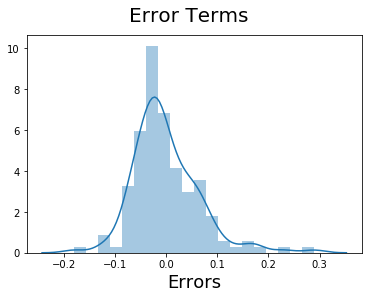

In [53]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

# Plotting histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

#Error term indicates to be approximately normally distributed and so the assumption of linear modelling seems to fulfil

### Prediction and Evaluation

In [54]:
# Now we focus on the test dataset
# scaling the data

num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [55]:
# Divide the data into X and y

y_test = df_test.pop('price')
X_test = df_test

In [56]:
# Let us use our model to make predictions
X_train_new = X_train_new.drop('const',axis=1)

In [57]:
# Dropping variables from X_test and creating a new dataframe
X_test_new = X_test[X_train_new.columns]

In [58]:
# Adding constant variable 
X_test_new = sm.add_constant(X_test_new)

In [59]:
# Making Predictions
y_pred = lm.predict(X_test_new)

In [60]:
#Model Evaluation (comparing y_pred and y_test)

from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8250052065076305

Text(0, 0.5, 'y_pred')

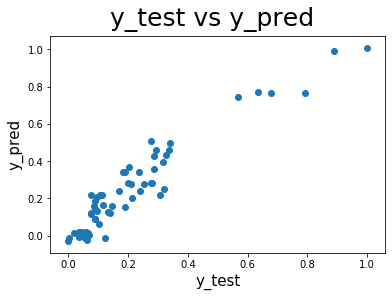

In [61]:
# Further Evaluation using scatterplot between y_test and y_pred

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=25)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15) 

In [62]:
# Statistically evaluation of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     337.9
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           3.26e-70
Time:                        13:26:11   Log-Likelihood:                 187.05
No. Observations:                 143   AIC:                            -364.1
Df Residuals:                     138   BIC:                            -349.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1176      0.016     -7.239      0.0

##### We can see that the equation of our best fitted line is:

price = 0.4792x(horsepower) + 0.4241x(carwidth) - 0.3512x(dohcv) + 0.2916x(Highend) - 0.1176

### Conclusion
- The R-sqr and Adjusted R-sqr (also known as the extent of fit) is 0.907 and 0.905 respectively,i.e ~ 90% variance is explained
- F-statistic is 337.9 and Prob(F-statistic) is 3.26e-70 which is approximately 0.0, hence we can say the Model fit is significant
- The p values of the coefficients of the independent variables/ predictors are all below the significant level of 0.05, hence we can say that they are statistically significant.